# Aims

- Test multivariate forecasting pipeline

In [1]:
# To call functions outside of this folder
import sys  
sys.path.insert(0, '..')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from src.forecast.multivariate import MultivariateForecasting

---

# Load Data

In [3]:
data = pd.read_csv('../data/multivariate/blow_mold_preprocessed.csv')

train = data[:252]
exog = data[252:].drop(columns='y')

test = data[252:].set_index('datetime')
test.index = pd.to_datetime(test.index)
test = test[['y']]

mf = MultivariateForecasting(train, exog)



---

# How does train test been splitted?

- Test size is same as forecast horizon size
- No sliding window for cross validation at this moment

In [17]:
len(mf.fh)

24

In [18]:
mf.X_test.shape

(24, 5)

---

# What is exog data?

- For example, using 3 different independent variable A, B, C to forecast y
- if the goal is to forecast next 4 y values, y_t+1, y_t+2, y_t+3, y_t+4
- both A, B and C must have the future 4 values in the first place, and these "future" values of A, B, C are exogenous data, which could be hard to collect
- Likely, these exogenous data are also forecasted by some other method, and any forecasting will carry error, these error will be accumulated in multivariate forecasting

---

# How does the forecast horizon been defined ?

- Forecast horizon is same size as exog 

In [20]:
mf.exog.shape

(24, 5)

In [5]:
mf.fh

ForecastingHorizon(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', name='datetime', freq=None, is_relative=False)

In [7]:
mf.train_xgboost()

---

# Forecast result

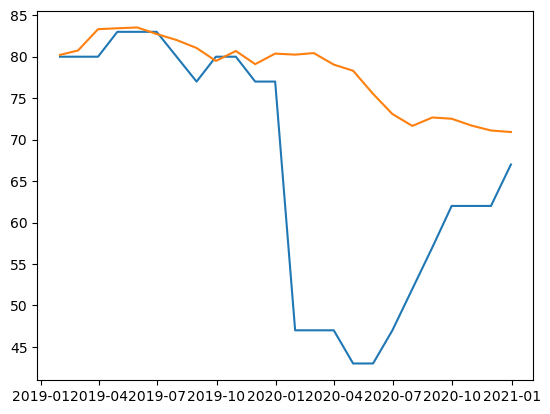

In [8]:
plt.plot(mf.y_test)
plt.plot(mf.models['xgboost']['test'])

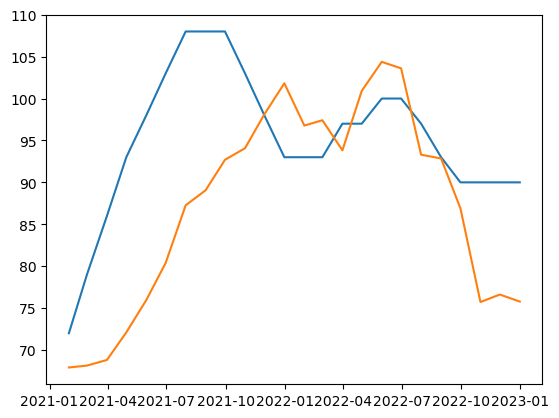

In [9]:
plt.plot(test)
plt.plot(mf.models['xgboost']['forecast'])

---

# What is the forecast accuracy?

In [21]:
mf.models['xgboost']['mape']

0.23537933276005385

---

# Can MAPE handle zeros?

- MAPE cannot handle inaccurate zero, zero, or very small value on true value will cause huge error size
- MAPE is not suitable for evaluating intermittent data

In [33]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

mean_absolute_percentage_error([1,0,1,1,0.001], [1,0,1,0,1])

200.0